## CartPole Skating

> **Problem**: Om Peter vill fly från vargen måste han kunna röra sig snabbare än den. Vi ska se hur Peter kan lära sig att åka skridskor, särskilt att hålla balansen, med hjälp av Q-Learning.

Först, låt oss installera gym och importera nödvändiga bibliotek:


In [1]:
#code block 1

## Skapa en cartpole-miljö


In [ ]:
#code block 2

För att se hur miljön fungerar, låt oss köra en kort simulering i 100 steg.


In [ ]:
#code block 3

Under simulering behöver vi få observationer för att kunna bestämma hur vi ska agera. Faktum är att `step`-funktionen ger oss aktuella observationer, belöningsfunktionen och `done`-flaggan som indikerar om det är meningsfullt att fortsätta simuleringen eller inte:


In [ ]:
#code block 4

Vi kan få min- och maxvärde för de där siffrorna:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Låt oss också utforska en annan diskretiseringsmetod med hjälp av bin:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Låt oss nu köra en kort simulering och observera dessa diskreta miljövärden.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-Tabellstruktur


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


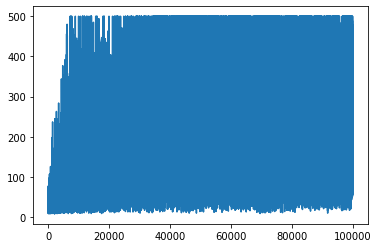

In [20]:
plt.plot(rewards)

Från denna graf är det inte möjligt att säga något, eftersom längden på träningssessionerna varierar kraftigt på grund av den stokastiska träningsprocessens natur. För att göra denna graf mer meningsfull kan vi beräkna **glidande medelvärde** över en serie experiment, låt oss säga 100. Detta kan göras enkelt med hjälp av `np.convolve`:


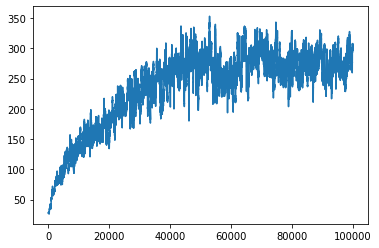

In [22]:
#code block 12

## Variera hyperparametrar och se resultatet i praktiken

Nu skulle det vara intressant att faktiskt se hur den tränade modellen beter sig. Låt oss köra simuleringen, och vi kommer att följa samma strategi för val av åtgärder som under träningen: sampling enligt sannolikhetsfördelningen i Q-Tabellen:


In [23]:
# code block 13

## Spara resultatet som en animerad GIF

Om du vill imponera på dina vänner kanske du vill skicka den animerade GIF-bilden av balansstången till dem. För att göra detta kan vi anropa `env.render` för att skapa en bildruta och sedan spara dessa som en animerad GIF med hjälp av PIL-biblioteket:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Ansvarsfriskrivning**:  
Detta dokument har översatts med hjälp av AI-översättningstjänsten [Co-op Translator](https://github.com/Azure/co-op-translator). Även om vi strävar efter noggrannhet, bör det noteras att automatiserade översättningar kan innehålla fel eller brister. Det ursprungliga dokumentet på dess originalspråk bör betraktas som den auktoritativa källan. För kritisk information rekommenderas professionell mänsklig översättning. Vi ansvarar inte för eventuella missförstånd eller feltolkningar som kan uppstå vid användning av denna översättning.
